In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Darknet 환경세팅

In [ ]:
%cd /content

!rm -rf darknet  

!git clone https://github.com/AlexeyAB/darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15277, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 15277 (delta 37), reused 53 (delta 31), pack-reused 15186
Receiving objects: 100% (15277/15277), 13.77 MiB | 13.01 MiB/s, done.
Resolving deltas: 100% (10348/10348), done.


AlexeyAB darknet source code clone 뒤 **1. Makelist, 2. detector.c** 수정

In [ ]:
%cd darknet

!make

[Errno 2] No such file or directory: 'darknet'
/content/darknet
chmod +x *.sh
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/detector.c -o obj/detector.o
./src/detector.c: In function ‘train_detector’:
./src/detector.c:386:72: warning: suggest parentheses around ‘&&’ within ‘||’ [-Wparentheses]
             (iteration >= (iter_save + 1000) || iteration % 1000 == 0) && net.max_batches < 10000)
             ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~
./src/detector.c: In function ‘print_cocos’:
./src/detector.c:486:29: warning: format not a string literal and no format arguments [-Wformat-security]
                 fprintf(fp, buff);
                             ^~~~
./src/detec

In [ ]:
!ls -al darknet

-rwxr-xr-x 1 root root 6587336 Jul 18 08:06 darknet


In [ ]:
!./darknet

usage: ./darknet <function>


## 2. YOLO v3 weight download

In [ ]:
%cd /content/darknet

!wget wget https://pjreddie.com/media/files/yolov3-openimages.weights

/content/darknet
--2021-07-18 08:06:30--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-07-18 08:06:30--  https://pjreddie.com/media/files/yolov3-openimages.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259229388 (247M) [application/octet-stream]
Saving to: ‘yolov3-openimages.weights’

yolov3-openimages.w 100%[===================>] 247.22M  20.2MB/s    in 13s     

2021-07-18 08:06:44 (18.8 MB/s) - ‘yolov3-openimages.weights’ saved [259229388/259229388]

FINISHED --2021-07-18 08:06:44--
Total wall clock time: 14s
Downloaded: 1 files, 247M in 13s (18.8 MB/s)


## 3. Google AI open image 압축풀기

In [ ]:
from google.colab import output
!cp "/content/drive/MyDrive/Colab Notebooks/[kaggle]Object_detection_Google_AI/google-ai-open-images-object-detection-track.zip" "google-ai-open-images-object-detection-track.zip"
!mkdir "./input"
!unzip "google-ai-open-images-object-detection-track.zip" -d "./input/"

output.clear()

## 4. Test to an arbitrary image file

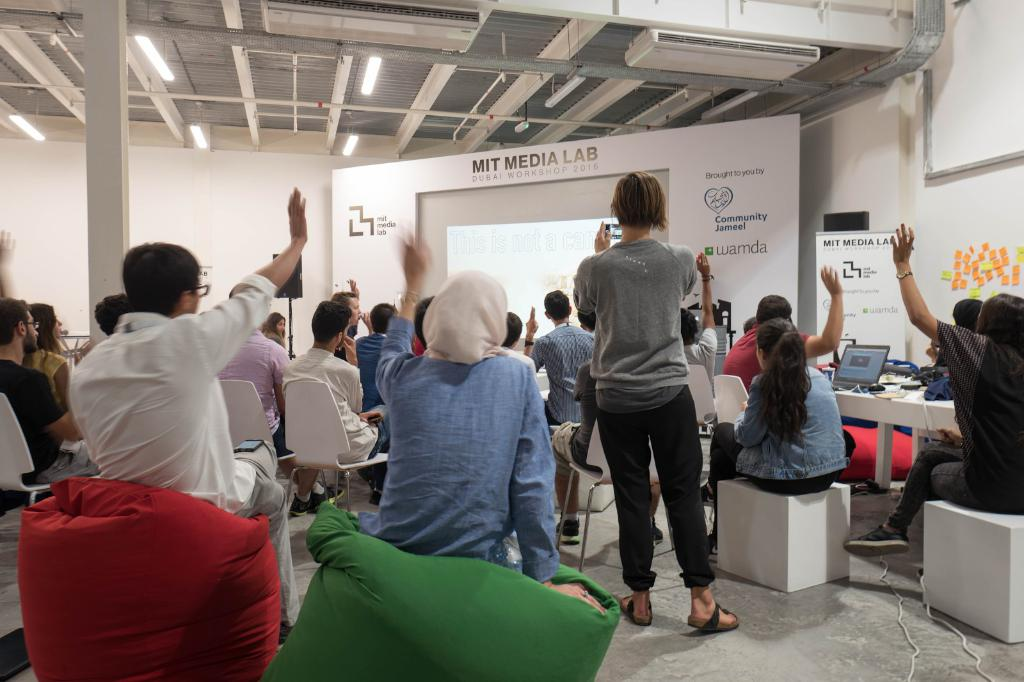

In [ ]:
from IPython.display import Image, display

display(Image(filename='./input/test/3bc4e7965d04d91f.jpg'))

In [ ]:
%cd /content/darknet

# !./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show ./input/test/3bc4e7965d04d91f.jpg -ext_output > output.txt
# !./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show -thresh 0.25 ./input/test/3bc4e7965d04d91f.jpg -ext_output output.txt
# !./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show -thresh 0.25 ./input/test/3bc4e7965d04d91f.jpg -out output.txt
!./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show -thresh 0.25 ./input/test/3bc4e7965d04d91f.jpg -save_labels

/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x 

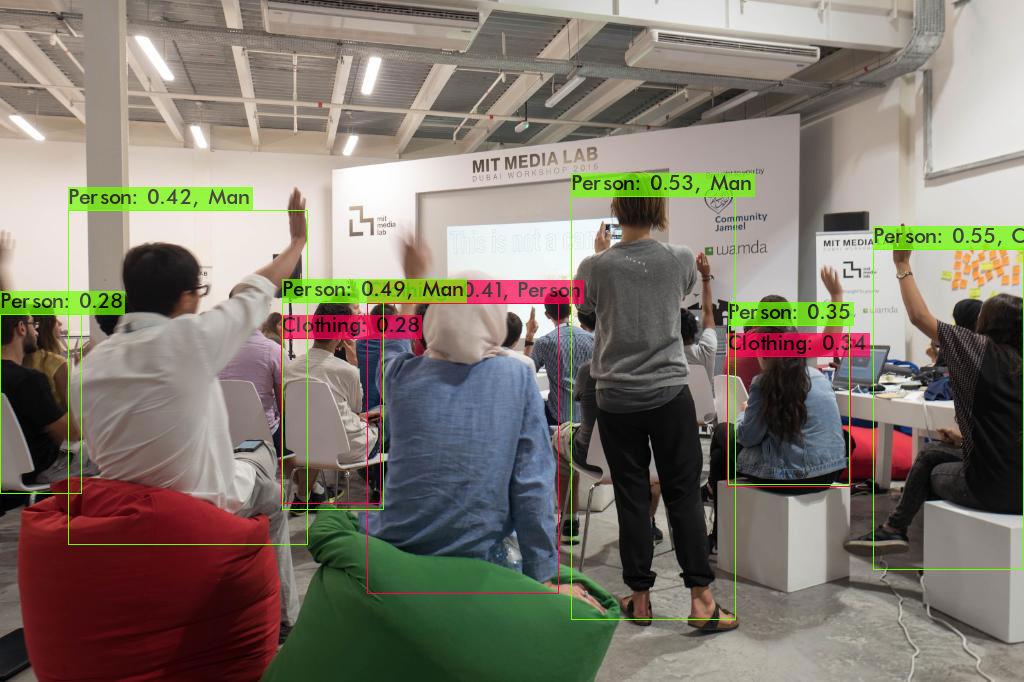

In [ ]:
from IPython.display import Image

Image('predictions.jpg')

## 4. Do it to all test files

Load all test images paths

In [ ]:
import glob
filenames = [] 
# ./input/test/3bc4e7965d04d91f.jpg
# files = sorted(glob.glob("./input/test/*.jpg"))

files = sorted(glob.glob("./input/test/*.jpg"))

with open('train.txt', 'w') as file:  
    for i in files:
        file.write('{0}\n'.format(i))


In [ ]:
files

['./input/test/00000b4dcff7f799.jpg',
 './input/test/00001a21632de752.jpg',
 './input/test/0000d67245642c5f.jpg',
 './input/test/0001244aa8ed3099.jpg',
 './input/test/000172d1dd1adce0.jpg',
 './input/test/0001c8fbfb30d3a6.jpg',
 './input/test/0001dd930912683d.jpg',
 './input/test/0002c96937fae3b3.jpg',
 './input/test/0002f94fe2d2eb9f.jpg',
 './input/test/000305ba209270dc.jpg',
 './input/test/000313fed9979d24.jpg',
 './input/test/0003a523fa9b2a3f.jpg',
 './input/test/0003d1c3be9ed3d6.jpg',
 './input/test/000455be7b222c04.jpg',
 './input/test/0004fdbc5b94c7c2.jpg',
 './input/test/0005339c44e6071b.jpg',
 './input/test/0005aea8c9144c77.jpg',
 './input/test/0005facd8dbaf39a.jpg',
 './input/test/0005fcc2fd4eaa4a.jpg',
 './input/test/00069966ba8519e5.jpg',
 './input/test/0007c05c94bcf41b.jpg',
 './input/test/0007e8279612ac07.jpg',
 './input/test/0007ffd0ba02c9ce.jpg',
 './input/test/0008348dfbd5d85f.jpg',
 './input/test/0008501b0c5108ab.jpg',
 './input/test/0008525fb2879723.jpg',
 './input/te

- **< ./train.txt >** option이 txt내부의 전체 files를 detect해주게 함
- **-save_labels** option을 통해 id, confidence, xmin, ymin, xmax, ymax 저장

In [ ]:
%cd /content/darknet

# !./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show -ext_output < ./train.txt > output.txt
# !./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show -save_labels  < ./train.txt

# !./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show < ./train.txt > -thresh 0.25 -save_labels
!./darknet detector test ./cfg/openimages.data ./cfg/yolov3-openimages.cfg yolov3-openimages.weights -dont_show < ./train.txt > result.txt -save_labels

추출된 result.txt 후처리

In [ ]:
import os
import pandas as pd

path = os.path.join(files[0][:-3] + "txt")
result = pd.read_csv(path, header=None, sep=" ")

cols = [0,1,2,4,3,5]
result = result[cols] # change column order to xmin, ymin, xmax, ymax
result[result < 0] = 0 # change negative xmin or ymin to zero

class_name = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[kaggle]Object_detection_Google_AI/class-descriptions-boxable.csv", header=None)

result.iloc[:,0] = class_name.iloc[result.iloc[:,0],0].reset_index()[0]
result["ImageId"] = path.split("/")[3][:-4]

result['PredictionString'] = result[result.columns[:-1]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)
result = result.groupby("ImageId")['PredictionString'].apply(' '.join).reset_index()



for i in range(1,len(files)) :
  try :
    path = os.path.join(files[i][:-3] + "txt")
    result_tmp = pd.read_csv(path, header=None, sep=" ")

    result_tmp = result_tmp[cols]
    result_tmp[result_tmp < 0] = 0

    result_tmp.iloc[:,0] = class_name.iloc[result_tmp.iloc[:,0],0].reset_index()[0]
    result_tmp["ImageId"] = path.split("/")[3][:-4]

    result_tmp['PredictionString'] = result_tmp[result_tmp.columns[:-1]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)
    result_tmp = result_tmp.groupby("ImageId")['PredictionString'].apply(' '.join).reset_index()

    result = pd.concat([result,result_tmp])
  except:
    continue

result


,ImageId,PredictionString
0,00000b4dcff7f799,/m/07yv9 0.5719 0.0 0.1469 0.5065 0.8571 /m/07...
0,00001a21632de752,/m/0dzct 0.5071 0.4842 0.3366 0.4986 0.3605 /m...
0,0000d67245642c5f,/m/0cgh4 0.8373 0.0 0.0 1.0547 1.034
0,000172d1dd1adce0,/m/0cgh4 0.4097 0.2072 0.045 0.8169 0.8485 /m/...
0,0001c8fbfb30d3a6,/m/01g317 0.7716 0.0 0.6137 1.0325 1.0087
...,...,...
0,fffc6e1254d41f67,/m/0cgh4 0.4216 0.1383 0.069 0.7627 0.9335 /m/...
0,fffd297f235ca68b,/m/01prls 0.4078 0.4682 0.7666 0.7893 0.9494 /...
0,fffe6ce981457e6e,/m/07yv9 0.3484 0.8233 0.3077 1.0021 0.701 /m/...
0,fffec786d733bbcb,/m/09j2d 0.2519 0.2323 0.1785 0.5501 0.6007 /m...


## 5. Submission file 생성

In [ ]:
sample_submission = pd.read_csv("./input/sample_submission.csv")

In [ ]:
submission_mine = pd.merge(
                          sample_submission,
                          result,
                          how="left",
                          on="ImageId"
                          )

In [ ]:
del submission_mine["PredictionString_x"]

submission_mine = submission_mine.rename(columns={'PredictionString_y': 'PredictionString'})
submission_mine

,ImageId,PredictionString
0,b5d912e06f74e948,/m/0c_jw 0.3639 0.8177 0.5895 1.0028 0.9333 /m...
1,be137cf6bb0b62d5,/m/09j2d 0.3074 0.5131 0.4088 0.8933 0.9936 /m...
2,8d65ca08cb5ce8e8,NaN
3,4d3ad1e52ad8c065,/m/0dzct 0.4308 0.4682 0.0901 0.5951 0.2984 /m...
4,9b94408691c7d7bf,NaN
...,...,...
99994,ed0c79184f3915a5,NaN
99995,d7395df8121658cf,/m/0dzct 0.4134 0.2192 0.3446 0.3666 0.4557 /m...
99996,17efc23faebe466b,/m/01g317 0.3477 0.0522 0.2098 0.5177 0.9757
99997,0dbf51f4a49d5d6d,NaN


In [ ]:
submission_mine.to_csv('/content/drive/MyDrive/Colab Notebooks/[kaggle]Object_detection_Google_AI/submission_mine.csv', sep=',')